In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [2]:
cdf = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
cdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = cdf.drop('Gender', axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [5]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

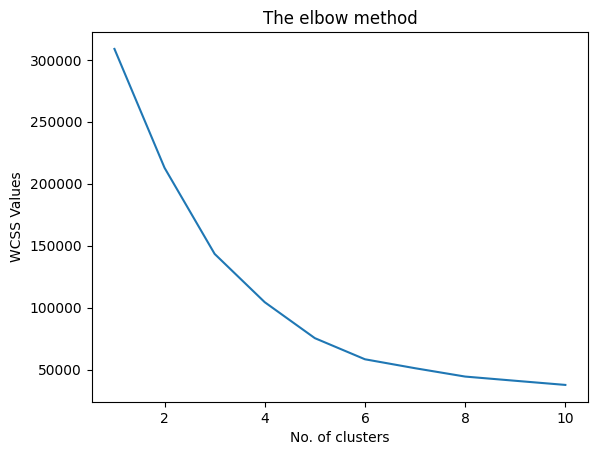

In [7]:
plt.plot(range (1,11), wcss)

plt.title('The elbow method')

plt.xlabel('No. of clusters')

plt.ylabel('WCSS Values')

plt.show()

In [8]:
kmeans = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 4 3 4 2 1 3 4 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4
 4 2 4 2 2 4 4 2 4 4 2 4 4 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 4 2 4 2 4 4 4 4 4
 2 2 2 2 2 4 4 4 4 2 2 2 0 2 0 5 0 5 0 5 0 2 0 5 0 5 0 5 0 5 0 2 0 5 0 5 0
 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0]


In [9]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,1
1,2,21,15,81,3
2,3,20,16,6,1
3,4,23,16,77,3
4,5,31,17,40,1


In [10]:
df.groupby('Clus_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,162.000000,32.692308,86.538462,82.128205
1,21.190476,44.142857,25.142857,19.523810
2,90.052632,27.000000,56.657895,49.131579
3,23.090909,25.272727,25.727273,79.363636
4,81.155556,56.155556,53.377778,49.088889
5,164.428571,41.685714,88.228571,17.285714


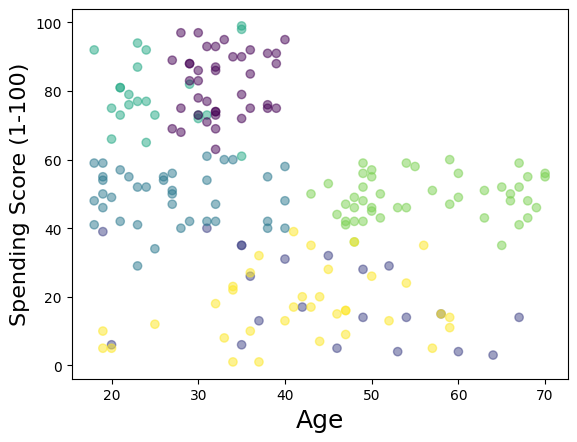

In [11]:
area = np.pi * ( X[:, 1])**2  
#plt.scatter(X[:, 0], X[:, 2],  s=area,c=labels.astype(np.float64), alpha=0.5)
plt.scatter(X[:, 0], X[:, 2],c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

In [12]:
'''
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#plt.xlabel('Annual Income (k$)', fontsize=16)
#plt.ylabel('Age', fontsize=18)
#plt.zlabel('Spending Score (1-100)', fontsize=16)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float64))
'''

"\nfrom mpl_toolkits.mplot3d import Axes3D \nfig = plt.figure(1, figsize=(8, 6))\nplt.clf()\nax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)\n\nplt.cla()\n#plt.xlabel('Annual Income (k$)', fontsize=16)\n#plt.ylabel('Age', fontsize=18)\n#plt.zlabel('Spending Score (1-100)', fontsize=16)\nax.set_xlabel('Annual Income (k$)')\nax.set_ylabel('Age')\nax.set_zlabel('Spending Score (1-100)')\n\nax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float64))\n"

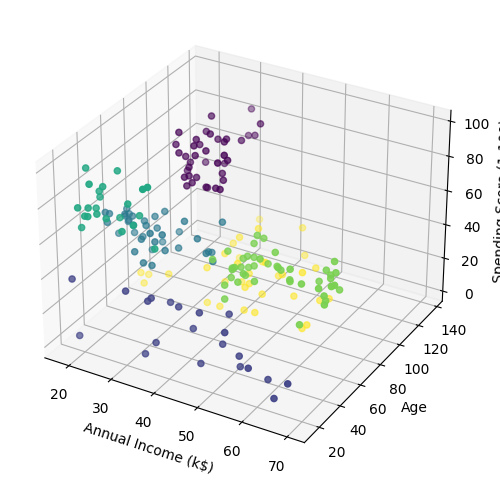

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the data stored in X and labels arrays
# Replace X and labels with your actual data

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float64))

plt.show()
